# INSY 670 - Social Media
**Assignment 1  
Part 1: Finding predictors of influence**

# Setup

In [1]:
import pandas as pd
import numpy as np
import os
import platform as pf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas_profiling
from IPython.display import display 
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None) #display all columns

random_state = 5
cwd = os.getcwd()
os_type = pf.system()

In [2]:
# Open file based on the OS type
if os_type == 'Windows':
    df = pd.read_csv(cwd + r'\data\influencers_kaggle_data.csv', sep=',\s,', delimiter=',', skipinitialspace=True)
else:
    df = pd.read_csv(cwd + '/influencers_kaggle_data.csv', sep=',\s,', delimiter=',', skipinitialspace=True)

In [3]:
# Open file based on the OS type
#if os_type == 'Windows':
#    df = pd.read_csv(cwd + r'\data\influencers_kaggle_data.csv', sep=',\s,', delimiter=',', skipinitialspace=True)
#else:
#    df = pd.read_csv(cwd + '/influencers_kaggle_data.csv', sep=',\s,', delimiter=',', skipinitialspace=True)

# Exploration

In [4]:
df.shape

(5500, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [6]:
df.head(10)

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,44.806452,4144.258065,11147,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,107.431818,2481.136364
6,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,44.806452,4144.258065,185616,1001,15117,266.013874,54.345230,13.111904,0.334766,13.665173,928,172.986229,5321.646186
7,1,9512,12,213,52.167068,23.182288,0.362150,0.100503,6.806045,195,11.678571,564.040816,8120,710,959,7.368643,2.088375,1.598798,0.595812,1.332849,29,205.533333,4302.466667
8,1,2273871,4524,11946,6782.405338,2944.524245,12.955723,2.791861,66.206208,21678,6.859364,1113.202016,298668,551,6209,493.256379,206.660552,4.115212,0.854539,3.075463,2021,75.970098,3865.446569
9,0,182598,1402,3831,145.844910,74.002958,23.549189,0.100503,15.953243,567,276.496516,8038.066202,117913,1299,9950,189.755230,67.310223,11.294831,2.567269,10.933766,791,185.542033,5535.939774


In [7]:
# full_profile = df.profile_report()
# full_profile.to_file('./full_data_profile.html')
df.profile_report(minimal=True) # For notebook performance

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.corr(method='pearson')
# High correlation >= 80% between certain variables such as retweets and mentions

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
Choice,1.000000,0.134133,0.063678,0.135078,0.020745,0.024139,0.123868,0.137833,0.107648,0.065543,0.073995,0.084508,-0.161278,-0.042859,-0.191179,-0.062332,-0.064774,-0.139521,-0.168341,-0.102028,-0.108259,-0.051364,-0.069339
A_follower_count,0.134133,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,-0.153272,-0.036082,0.155347,0.033327,0.140186,0.029233,0.030709,-0.011715,-0.010649,-0.013452,0.051651,-0.033974,-0.014107
A_following_count,0.063678,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,0.043642,0.097762,-0.007616,-0.010944,-0.011792,0.001077,-0.001774,0.006797,0.002244,-0.000280,-0.002475,0.003415,-0.003968
A_listed_count,0.135078,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,-0.080056,-0.038574,0.211085,0.048962,0.203068,0.045555,0.045333,-0.002835,0.006040,0.003535,0.068414,-0.034576,-0.010478
A_mentions_received,0.020745,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,-0.062407,-0.038079,0.146134,0.023431,0.136128,0.010900,0.008098,-0.008721,-0.012288,-0.011123,0.023156,-0.017576,-0.011153
A_retweets_received,0.024139,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,-0.065266,-0.040301,0.149532,0.023340,0.139695,0.011525,0.008719,-0.007203,-0.012692,-0.009671,0.023931,-0.017675,-0.012855
A_mentions_sent,0.123868,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,0.064242,0.035437,-0.005732,0.027851,0.005401,0.006467,0.010684,0.016772,0.003553,0.019061,0.005172,0.016377,0.014035
A_retweets_sent,0.137833,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,-0.048761,-0.042127,0.024915,0.016303,0.038314,0.057745,0.060162,0.029084,0.011914,0.039341,0.050733,-0.004573,0.005986
A_posts,0.107648,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,-0.066125,-0.018347,-0.011992,0.021679,-0.005321,0.001848,0.005974,0.028039,0.002118,0.023880,-0.001924,0.010813,0.004692
A_network_feature_1,0.065543,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,-0.118138,-0.071711,0.138820,0.034620,0.127232,0.012452,0.011003,-0.002757,-0.012546,-0.010237,0.026392,-0.023533,-0.015348


In [9]:
df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,84.805209,3747.219758,6.854869e+05,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,104.073204,5757.339852,2.160612e+06,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000,2.000000e+01,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,14.991870,1180.805341,2.498250e+03,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,54.925234,2206.420734,4.402700e+04,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,109.695652,4390.379310,3.701142e+05,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1121.000000,144651.461538,3.654319e+07,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


# Processing

Rename network related columns

In [10]:
df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [11]:
df.rename(columns={'A_network_feature_1': 'A_degree', 'A_network_feature_2': 'A_betweenness', 'A_network_feature_3': 'A_closeness',
                  'B_network_feature_1': 'B_degree', 'B_network_feature_2': 'B_betweenness', 'B_network_feature_3': 'B_closeness'}
          , inplace=True)

In [12]:
df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_degree', 'A_betweenness',
       'A_closeness', 'B_follower_count', 'B_following_count',
       'B_listed_count', 'B_mentions_received', 'B_retweets_received',
       'B_mentions_sent', 'B_retweets_sent', 'B_posts', 'B_degree',
       'B_betweenness', 'B_closeness'],
      dtype='object')

To facilitate the analysis (mainly condensing data while keeping information), we merge all columns. We use the difference (A-B) as we are working with generally positive big numbers. We believe that the division (A/B) will be harder to interpret given the context and it might lead to issues as there are several 0 values.

For network features, we believe that using 

In [13]:
df['dAB_follower'] = df['A_follower_count'] - df['B_follower_count']
df['dAB_following'] = df['A_following_count'] - df['B_following_count']
df['dAB_listed'] = df['A_listed_count'] - df['B_listed_count']
df['dAB_mentions_received'] = df['A_mentions_received'] - df['B_mentions_received']
df['dAB_mentions_sent'] = df['A_mentions_sent'] - df['B_mentions_sent']
df['dAB_retweets_received'] = df['A_retweets_received'] - df['B_retweets_received']
df['dAB_retweets_sent'] = df['A_retweets_sent'] - df['B_retweets_sent']
df['dAB_posts'] = df['A_posts'] - df['B_posts']
df['dAB_degree'] = df['A_degree'] - df['B_degree']
df['dAB_betweenness'] = df['A_betweenness'] - df['B_betweenness']
df['dAB_closeness'] = df['A_closeness'] - df['B_closeness']

Keep initial columns for financial analysis

In [14]:
columns_to_drop = ['A_follower_count', 'B_follower_count', 'A_following_count', 'B_following_count', 'A_listed_count', 'B_listed_count',
          'A_mentions_received', 'B_mentions_received', 'A_mentions_sent', 'B_mentions_sent', 'A_retweets_received', 'B_retweets_received',
          'A_retweets_sent', 'B_retweets_sent', 'A_posts', 'B_posts', 'A_degree', 'B_degree', 'A_betweenness', 'B_betweenness', 'A_closeness', 'B_closeness']
df_all = df.copy()
df.drop(columns=columns_to_drop, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Choice                 5500 non-null   int64  
 1   dAB_follower           5500 non-null   int64  
 2   dAB_following          5500 non-null   int64  
 3   dAB_listed             5500 non-null   int64  
 4   dAB_mentions_received  5500 non-null   float64
 5   dAB_mentions_sent      5500 non-null   float64
 6   dAB_retweets_received  5500 non-null   float64
 7   dAB_retweets_sent      5500 non-null   float64
 8   dAB_posts              5500 non-null   float64
 9   dAB_degree             5500 non-null   int64  
 10  dAB_betweenness        5500 non-null   float64
 11  dAB_closeness          5500 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 515.8 KB


In [16]:
df.describe()

,Choice,dAB_follower,dAB_following,dAB_listed,dAB_mentions_received,dAB_mentions_sent,dAB_retweets_received,dAB_retweets_sent,dAB_posts,dAB_degree,dAB_betweenness,dAB_closeness
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,-3.560291e+04,-7.931036e+01,49.304909,1.114342e+02,-0.087785,35.221885,0.003688,-0.415091,12.834364,-0.218986,2.044277
std,0.499956,2.724394e+06,7.043435e+04,21248.786134,3.826375e+04,13.497549,14335.255250,2.706191,26.374714,38911.503783,147.537349,8004.969474
min,0.000000,-3.619107e+07,-6.643230e+05,-544716.000000,-1.144742e+06,-76.709011,-435624.675035,-16.190036,-192.971915,-918957.000000,-1816.719697,-74409.992424
25%,0.000000,-1.838008e+05,-1.384750e+03,-3477.250000,-1.827743e+02,-4.320936,-62.624442,-0.729064,-5.491086,-671.000000,-59.634217,-2151.743979
50%,1.000000,1.500000e+01,1.600000e+01,6.000000,-1.458770e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-75.796970
75%,1.000000,1.779708e+05,1.501000e+03,3638.500000,1.814826e+02,4.286998,64.416753,0.736936,5.202471,676.000000,61.516295,2129.051229
max,1.000000,3.506800e+07,1.162212e+06,518386.000000,1.143815e+06,76.709011,435394.770296,15.933596,192.971915,915090.000000,1078.000000,142621.361538


In [17]:
df.corr(method='pearson')
# Still high correlated between recieved mentions and retweets received
# Might be better to combine these to elimanate correlation and for the analysis (tweets vs non-tweets)

,Choice,dAB_follower,dAB_following,dAB_listed,dAB_mentions_received,dAB_mentions_sent,dAB_retweets_received,dAB_retweets_sent,dAB_posts,dAB_degree,dAB_betweenness,dAB_closeness
Choice,1.000000,0.227788,0.074765,0.256865,0.056682,0.187936,0.060659,0.217960,0.149879,0.123262,0.089340,0.108580
dAB_follower,0.227788,1.000000,0.163200,0.781208,0.418109,0.028812,0.425126,0.097089,0.060312,0.551474,-0.125846,-0.032267
dAB_following,0.074765,0.163200,1.000000,0.136244,0.045302,0.105646,0.039462,-0.090832,0.138281,0.040724,0.042268,0.097285
dAB_listed,0.256865,0.781208,0.136244,1.000000,0.678317,0.068354,0.691995,0.155286,0.066421,0.653893,-0.052659,-0.032920
dAB_mentions_received,0.056682,0.418109,0.045302,0.678317,1.000000,0.026066,0.988363,0.029826,0.034493,0.914479,-0.049321,-0.031937
dAB_mentions_sent,0.187936,0.028812,0.105646,0.068354,0.026066,1.000000,0.019312,0.569724,0.589685,0.032601,0.058527,0.033922
dAB_retweets_received,0.060659,0.425126,0.039462,0.691995,0.988363,0.019312,1.000000,0.024424,0.039879,0.920574,-0.051504,-0.032745
dAB_retweets_sent,0.217960,0.097089,-0.090832,0.155286,0.029826,0.569724,0.024424,1.000000,0.378280,0.067151,-0.038189,-0.034783
dAB_posts,0.149879,0.060312,0.138281,0.066421,0.034493,0.589685,0.039879,0.378280,1.000000,0.086814,-0.070690,-0.035268
dAB_degree,0.123262,0.551474,0.040724,0.653893,0.914479,0.032601,0.920574,0.067151,0.086814,1.000000,-0.098845,-0.062896


Separate tweets and non-tweets

In [18]:
df.rename(columns={'dAB_posts': 'dAB_tweets'}, inplace=True)
df['dAB_non_tweets_sent'] = df['dAB_mentions_sent'] + df['dAB_retweets_sent'] 
df['dAB_non_tweets_received'] = df['dAB_mentions_received'] + df['dAB_retweets_received']
columns_to_drop = ['dAB_mentions_sent', 'dAB_retweets_sent', 'dAB_mentions_received', 'dAB_retweets_received']
df.drop(columns=columns_to_drop, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Choice                   5500 non-null   int64  
 1   dAB_follower             5500 non-null   int64  
 2   dAB_following            5500 non-null   int64  
 3   dAB_listed               5500 non-null   int64  
 4   dAB_tweets               5500 non-null   float64
 5   dAB_degree               5500 non-null   int64  
 6   dAB_betweenness          5500 non-null   float64
 7   dAB_closeness            5500 non-null   float64
 8   dAB_non_tweets_sent      5500 non-null   float64
 9   dAB_non_tweets_received  5500 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 429.8 KB


In [20]:
df.describe()

,Choice,dAB_follower,dAB_following,dAB_listed,dAB_tweets,dAB_degree,dAB_betweenness,dAB_closeness,dAB_non_tweets_sent,dAB_non_tweets_received
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03
mean,0.509455,-3.560291e+04,-7.931036e+01,49.304909,-0.415091,12.834364,-0.218986,2.044277,-0.084097,1.466561e+02
std,0.499956,2.724394e+06,7.043435e+04,21248.786134,26.374714,38911.503783,147.537349,8004.969474,15.202890,5.247751e+04
min,0.000000,-3.619107e+07,-6.643230e+05,-544716.000000,-192.971915,-918957.000000,-1816.719697,-74409.992424,-82.000679,-1.580367e+06
25%,0.000000,-1.838008e+05,-1.384750e+03,-3477.250000,-5.491086,-671.000000,-59.634217,-2151.743979,-5.112589,-2.532143e+02
50%,1.000000,1.500000e+01,1.600000e+01,6.000000,0.000000,0.000000,0.000000,-75.796970,0.000000,1.001514e-01
75%,1.000000,1.779708e+05,1.501000e+03,3638.500000,5.202471,676.000000,61.516295,2129.051229,5.191838,2.535015e+02
max,1.000000,3.506800e+07,1.162212e+06,518386.000000,192.971915,915090.000000,1078.000000,142621.361538,82.000679,1.579209e+06


In [21]:
df.corr(method='pearson')
# Might be worth merging non_tweets recieved and sent too as we have high correlation with degree

,Choice,dAB_follower,dAB_following,dAB_listed,dAB_tweets,dAB_degree,dAB_betweenness,dAB_closeness,dAB_non_tweets_sent,dAB_non_tweets_received
Choice,1.000000,0.227788,0.074765,0.256865,0.149879,0.123262,0.089340,0.108580,0.205653,0.057900
dAB_follower,0.227788,1.000000,0.163200,0.781208,0.060312,0.551474,-0.125846,-0.032267,0.042862,0.420994
dAB_following,0.074765,0.163200,1.000000,0.136244,0.138281,0.040724,0.042268,0.097285,0.077627,0.043812
dAB_listed,0.256865,0.781208,0.136244,1.000000,0.066421,0.653893,-0.052659,-0.032920,0.088328,0.683624
dAB_tweets,0.149879,0.060312,0.138281,0.066421,1.000000,0.086814,-0.070690,-0.035268,0.590875,0.036044
dAB_degree,0.123262,0.551474,0.040724,0.653893,0.086814,1.000000,-0.098845,-0.062896,0.040897,0.918261
dAB_betweenness,0.089340,-0.125846,0.042268,-0.052659,-0.070690,-0.098845,1.000000,0.537316,0.045164,-0.050032
dAB_closeness,0.108580,-0.032267,0.097285,-0.032920,-0.035268,-0.062896,0.537316,1.000000,0.023926,-0.032232
dAB_non_tweets_sent,0.205653,0.042862,0.077627,0.088328,0.590875,0.040897,0.045164,0.023926,1.000000,0.026617
dAB_non_tweets_received,0.057900,0.420994,0.043812,0.683624,0.036044,0.918261,-0.050032,-0.032232,0.026617,1.000000


In [22]:
df.shape

(5500, 10)

In [23]:
# Cleaner to avoid duplicates in the model and in-line with assumption that each row is unique
df.drop_duplicates(inplace=True) 

In [24]:
df.shape

(5368, 10)

In [25]:
# clean_profile = df.profile_report()
# clean_profile.to_file('./clean_data_profile.html')
df.profile_report(minimal=True) # For notebook performance

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We will start off without scaling the values as the coefficients might become hard to interpret and might not be as useful depending on the methods used

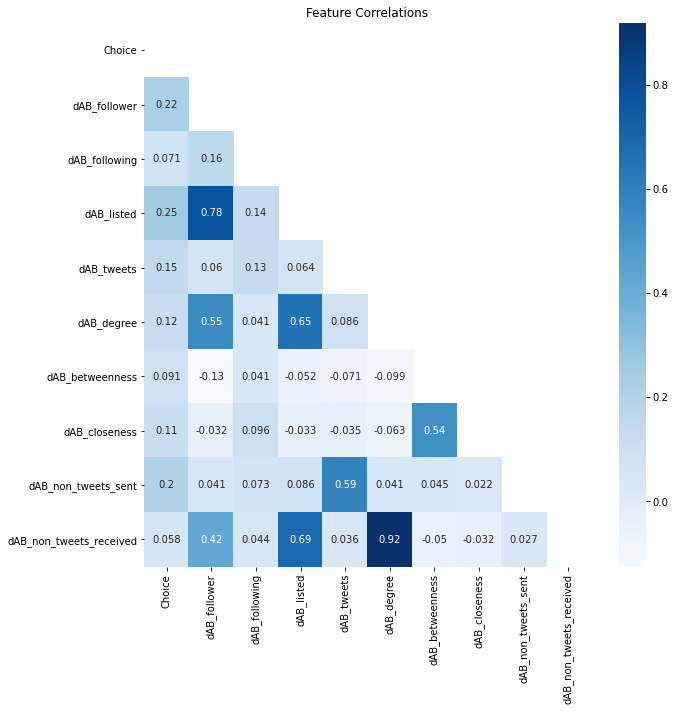

In [26]:
# Compute the correlation matrix

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, ax=ax, mask=mask, cmap = "Blues").set(title='Feature Correlations')
plt.show()

In [27]:
y = df['Choice']
X = df.drop(columns=['Choice'])

## Feature Importance

<AxesSubplot:ylabel='feature'>

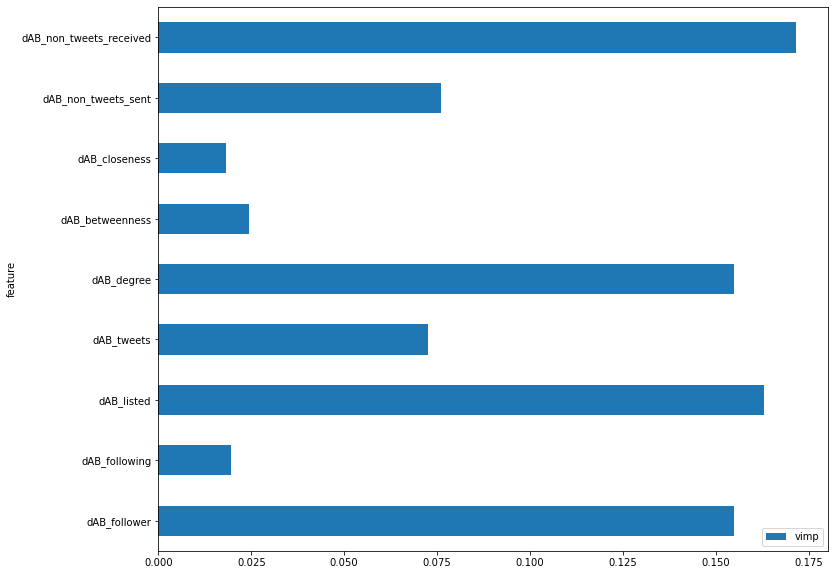

In [28]:
from sklearn import feature_selection
mic = feature_selection.mutual_info_classif(
 X, y
)
fig, ax = plt.subplots(figsize=(12,10))
(
 pd.DataFrame(
 {"feature": X.columns, "vimp": mic}
 )
 .set_index("feature")
 .plot.barh(ax=ax)
)

Dropping 3 variables from the model. 1.dAB_closeness, 2.dAB_following, 3.dAB_betweenness

# Split

In [29]:
y = df['Choice']
X = df.drop(columns=['Choice','dAB_closeness','dAB_following','dAB_betweenness'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [31]:
X_train

,dAB_follower,dAB_listed,dAB_tweets,dAB_degree,dAB_non_tweets_sent,dAB_non_tweets_received
153,54199,2596,9.470172,429,17.807796,134.345286
3552,-561865,-11441,-8.347060,-23064,-15.829828,-11545.815266
2938,333766,-52,-19.333567,262,-2.049033,119.559531
1777,-302140,-22090,-2.282147,-656,-6.500353,-206.418724
4651,462051,888,-2.730123,722,-1.231005,329.381878
...,...,...,...,...,...,...
3091,179385,14638,8.891122,698,11.266563,225.857731
1738,-230283,-7800,-3.805757,-674,-4.048943,-274.295837
4157,729,20,0.303505,-9,-0.643997,-3.214211
2274,-809212,-12831,29.787722,223,30.558987,493.524106


In [32]:
X_test

,dAB_follower,dAB_listed,dAB_tweets,dAB_degree,dAB_non_tweets_sent,dAB_non_tweets_received
871,407508,1541,15.535698,1481,25.685703,645.336344
3385,723050,7228,2.060930,5199,-1.728534,2010.289029
336,-223548,-6179,-3.018217,-181,2.969081,-55.945857
2919,-257673,-8527,0.163069,-338,-0.107881,-93.511359
3030,870609,13798,2.522047,552,3.542704,185.590353
...,...,...,...,...,...,...
2519,-422610,-8140,-26.344127,-8344,-2.692733,-3319.215805
3412,-787,32,1.021648,24,1.829070,8.628466
4939,9765566,92778,-1.033609,5526,-1.551670,1826.625040
1552,3301,127,0.748984,13,-0.256364,3.444123


In [33]:
y_train

153     1
3552    0
2938    1
1777    0
4651    1
       ..
3091    1
1738    0
4157    0
2274    0
2950    1
Name: Choice, Length: 3596, dtype: int64

## Model

In [34]:
#1. Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log_reg = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
model = log_reg.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(score)
print(classification_report(model.predict(X_test), y_test, digits=3))

0.7483069977426636
              precision    recall  f1-score   support

           0      0.745     0.748     0.747       878
           1      0.752     0.748     0.750       894

    accuracy                          0.748      1772
   macro avg      0.748     0.748     0.748      1772
weighted avg      0.748     0.748     0.748      1772



In [35]:
#2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=40, random_state=random_state)
model = rf.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(score)
print(classification_report(model.predict(X_test), y_test, digits=3))

0.739841986455982
              precision    recall  f1-score   support

           0      0.737     0.739     0.738       879
           1      0.743     0.740     0.741       893

    accuracy                          0.740      1772
   macro avg      0.740     0.740     0.740      1772
weighted avg      0.740     0.740     0.740      1772



In [36]:
# 3. ADA Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
ada = AdaBoostClassifier(n_estimators=100, random_state=random_state)
model = ada.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(score)


0.7522573363431151


In [37]:
# 4. XG Boost Classifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
xgb=XGBClassifier(random_state=1, learning_rate=0.04)
model_xgb = xgb.fit(X_train, y_train)

score = model_xgb.score(X_test, y_test)
y_test_pred_xgb = model_xgb.predict(X_test)

print(score)
print(classification_report(model.predict(X_test), y_test, digits=3))

0.7669300225733634
              precision    recall  f1-score   support

           0      0.738     0.758     0.748       859
           1      0.766     0.747     0.757       913

    accuracy                          0.752      1772
   macro avg      0.752     0.752     0.752      1772
weighted avg      0.753     0.752     0.752      1772



## Confusion Matrix

C:\Users\18199\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\18199\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


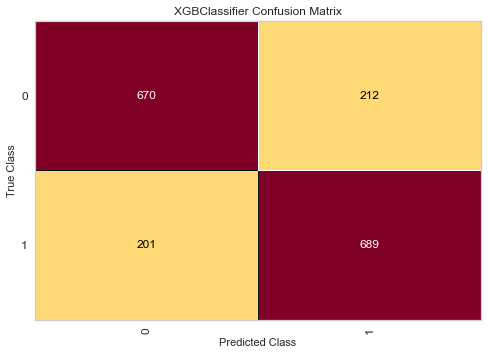

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_xgb, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

cm.show()

## Final Feature Importance

In [39]:
# Taking the best model - XGBoost
features = {}
for feature, importance in zip(X.columns, model_xgb.feature_importances_):
    features[feature] = importance #add the name/value pair 
feature_importance = pd.DataFrame.from_dict(features, orient='index').rename(columns={0: 'Importance'})
feature_importance

,Importance
dAB_follower,0.093680
dAB_listed,0.478216
dAB_tweets,0.077184
dAB_degree,0.148541
dAB_non_tweets_sent,0.079660
dAB_non_tweets_received,0.122718


In [40]:
feature_importance.to_csv(cwd + r'\data\feature_importance.csv')

<AxesSubplot:>

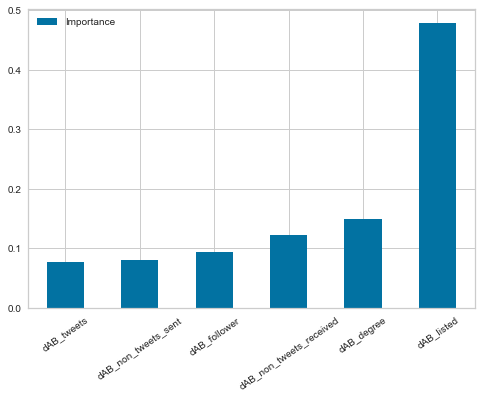

In [41]:
feature_importance.sort_values(by='Importance').plot(kind='bar', rot=35)

# Financial Model

**Calculating predictions based on the best model i.e. XGB Classifier with same seed**

In [42]:
y_fn = df_all['Choice']
X_fn = df_all.drop(columns=['Choice','dAB_closeness','dAB_following','dAB_betweenness'])
X_train, X_test, y_train, y_test = train_test_split(X_fn, y_fn, test_size=0.33, random_state=5)

xgb=XGBClassifier(random_state=random_state, learning_rate=0.04)
model_xgb = xgb.fit(X_train, y_train)
y_test_pred_xgb = model_xgb.predict(X_test)

**Database to calculate the financial impact on the test dataset**

In [43]:
financial_df_cal = X_test.copy()

In [44]:
financial_df_cal['Influencer'] = np.where(y_test==1,'A','B')
financial_df_cal['Influencer_Pred'] = np.where(y_test_pred_xgb==1,'A','B')

In [45]:
financial_df_cal = financial_df_cal[['A_follower_count','B_follower_count','Influencer','Influencer_Pred']]

In [46]:
financial_df_cal['Correct_Decision'] = (financial_df_cal['Influencer'] == financial_df_cal['Influencer_Pred'])
financial_df_cal

,A_follower_count,B_follower_count,Influencer,Influencer_Pred,Correct_Decision
4496,221001,5501,A,A,True
4938,314,631958,B,B,True
1183,1203,1221,B,A,False
453,2774790,671,A,A,True
2904,322682,44027,A,A,True
...,...,...,...,...,...
4047,444,1634478,B,B,True
130,1834007,20288,A,A,True
2629,1010,614689,B,B,True
1154,5941,19562,B,B,True


**Financial Impact (With and without Analytical model)**  
Information given:

In [47]:
profit_margin = 10
prob_1_tweet = 0.01/100
prob_2_tweet = 0.015/100
cost_1_tweet = 5
cost_2_tweet = 10

**Without analytical model**

In [48]:
financial_df_cal['Without_Model'] = np.where(financial_df_cal['Influencer'] == 'A',
                                             financial_df_cal['A_follower_count']*profit_margin*prob_1_tweet,
                                             financial_df_cal['B_follower_count']*profit_margin*prob_1_tweet)

In [49]:
Total_Profit_without_analytics = (financial_df_cal['Without_Model'].sum()- 2*cost_1_tweet*financial_df_cal['A_follower_count'].count())
Total_Profit_without_analytics

1676211.3790000002

The total profit without using analytical model is **$1676211**

**With analytical model**

In [50]:
financial_df_cal['With_Model'] = np.where(financial_df_cal['Influencer_Pred'] == 'A',
                                             financial_df_cal['A_follower_count']*profit_margin*prob_2_tweet,
                                             financial_df_cal['B_follower_count']*profit_margin*prob_2_tweet)

In [51]:
Total_Profit_with_analytics = (financial_df_cal['With_Model'].sum()- (cost_2_tweet*financial_df_cal['A_follower_count'].count()))
Total_Profit_with_analytics

2877445.9605

The total profit with analytical model is **$2877446**

**Perfect model**

In [56]:
financial_df_cal['Perfect_Model'] = np.where(financial_df_cal['Influencer'] == 'A',
                                             financial_df_cal['A_follower_count']*profit_margin*prob_2_tweet,
                                             financial_df_cal['B_follower_count']*profit_margin*prob_2_tweet)

In [57]:
Total_Profit_with_perfect = (financial_df_cal['Perfect_Model'].sum()- (cost_2_tweet*financial_df_cal['A_follower_count'].count()))
Total_Profit_with_perfect

2523392.0685

**Model Impact**

In [53]:
Model_Impact = Total_Profit_with_analytics - Total_Profit_without_analytics
Model_Impact

1201234.5814999999

In [54]:
(Total_Profit_with_analytics - Total_Profit_without_analytics)/Total_Profit_without_analytics

0.7166366942435604

The financial impact in the test dataset is equal to **$ 1201235**